In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, multi_gpu_model

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
data_dir = 'data/'

In [5]:
train_data = np.load(path.join(data_dir, 'imagenet_6_class_train_data.npz'))
val_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))
test_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))

In [6]:
x_train = train_data['x_data']
y_train = train_data['y_data']
x_val = val_data['x_data']
y_val = val_data['y_data']
x_test = test_data['x_data']
y_test = test_data['y_data']
y_table_array = test_data['y_table_array']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table_array.shape

((4680, 341, 341, 3),
 (4680,),
 (1560, 341, 341, 3),
 (1560,),
 (1560, 341, 341, 3),
 (1560,),
 (6, 2))

In [7]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4680, 341, 341, 3),
 (4680, 6),
 (1560, 341, 341, 3),
 (1560, 6),
 (1560, 341, 341, 3),
 (1560, 6))

In [8]:
y_list = [text for _, text in y_table_array]
y_list

['bed', 'bird', 'cat', 'dog', 'house', 'tree']

In [9]:
input_shape = x_train[0].shape
output_size = len(y_list)

In [10]:
def build_2d_cnn_custom_ch_32_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=5, filters=32*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=3, strides=(3,3), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.5)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [11]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 341, 341, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 415872)            0         
_________________________________________________________________
dropout (Dropout)    

Train on 4680 samples, validate on 1560 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.5220 - acc: 0.3859
Epoch 00001: val_loss improved from inf to 1.22440, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_2_conv_checkpoint/001-1.2244.hdf5
4680/4680 [==============================] - 17s 4ms/sample - loss: 1.5214 - acc: 0.3863 - val_loss: 1.2244 - val_acc: 0.5250
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.1769 - acc: 0.5456
Epoch 00002: val_loss improved from 1.22440 to 1.06595, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_2_conv_checkpoint/002-1.0659.hdf5
4680/4680 [==============================] - 15s 3ms/sample - loss: 1.1764 - acc: 0.5459 - val_loss: 1.0659 - val_acc: 0.5987
Epoch 3/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.0279 - acc: 0.6143
Epoch 00003: val_loss impr

Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3047 - acc: 0.9114
Epoch 00025: val_loss did not improve from 0.76473
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.3042 - acc: 0.9115 - val_loss: 0.8041 - val_acc: 0.7353
Epoch 26/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2884 - acc: 0.9122
Epoch 00026: val_loss did not improve from 0.76473
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.2885 - acc: 0.9122 - val_loss: 0.8076 - val_acc: 0.7263
Epoch 27/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2798 - acc: 0.9146
Epoch 00027: val_loss did not improve from 0.76473
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.2804 - acc: 0.9143 - val_loss: 0.8294 - val_acc: 0.7218
Epoch 28/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2676 - acc: 0.9157
Epoch 00028: val_loss did not improve from 0.76473
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.0844 - acc: 0.9775
Epoch 00055: val_loss did not improve from 0.76473
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.0843 - acc: 0.9776 - val_loss: 1.1155 - val_acc: 0.7179
Epoch 56/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0741 - acc: 0.9833
Epoch 00056: val_loss did not improve from 0.76473
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.0740 - acc: 0.9833 - val_loss: 1.1070 - val_acc: 0.7256
Epoch 57/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0675 - acc: 0.9857
Epoch 00057: val_loss did not improve from 0.76473
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.0675 - acc: 0.9857 - val_loss: 1.0880 - val_acc: 0.7263
Epoch 58/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9842
Epoch 00058: val_loss did not improve from 0.76473
4680/4680 [==============================] - 15s 3m

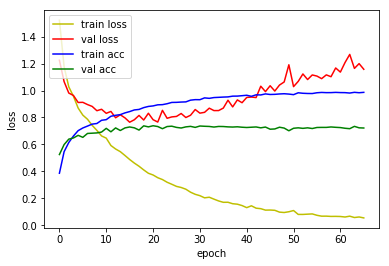

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.7697 - acc: 0.7417
Loss: 0.7696938050098908 Accuracy: 0.7416667

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.6251 - acc: 0.3166
Epoch 00001: val_loss improved from inf to 1.37646, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/001-1.3765.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 1.6240 - acc: 0.3175 - val_loss: 1.3765 - val_acc: 0.4647
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.2810 - acc: 0.4998
Epoch 00002: val_loss improved from 1.37646 to 1.22801, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/002-1.2280.hdf5
4680/4680 [==============================] - 15s 3ms/sample - loss: 1.2806 - acc: 0.5000 - val_loss: 1.2280 - val_acc: 0.5269
Epoch 3/500
4672/4680 [===========

Epoch 23/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6286 - acc: 0.7817
Epoch 00023: val_loss improved from 0.72020 to 0.71773, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/023-0.7177.hdf5
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.6289 - acc: 0.7814 - val_loss: 0.7177 - val_acc: 0.7378
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6076 - acc: 0.7945
Epoch 00024: val_loss improved from 0.71773 to 0.70447, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_3_conv_checkpoint/024-0.7045.hdf5
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.6076 - acc: 0.7944 - val_loss: 0.7045 - val_acc: 0.7487
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.5887 - acc: 0.7935
Epoch 00025: val_loss did not improve from 0.70447
4680/4680 [==============================] - 15s 3ms/sample - lo

4672/4680 [============================>.] - ETA: 0s - loss: 0.3671 - acc: 0.8765
Epoch 00049: val_loss did not improve from 0.61453
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.3674 - acc: 0.8763 - val_loss: 0.6266 - val_acc: 0.7923
Epoch 50/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3582 - acc: 0.8735
Epoch 00050: val_loss did not improve from 0.61453
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.3578 - acc: 0.8737 - val_loss: 0.6218 - val_acc: 0.7853
Epoch 51/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3452 - acc: 0.8861
Epoch 00051: val_loss did not improve from 0.61453
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.3455 - acc: 0.8861 - val_loss: 0.6350 - val_acc: 0.7891
Epoch 52/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3433 - acc: 0.8868
Epoch 00052: val_loss did not improve from 0.61453
4680/4680 [==============================] - 15s 3m

4672/4680 [============================>.] - ETA: 0s - loss: 0.2084 - acc: 0.9300
Epoch 00078: val_loss did not improve from 0.60637
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.2083 - acc: 0.9301 - val_loss: 0.6959 - val_acc: 0.7840
Epoch 79/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1949 - acc: 0.9336
Epoch 00079: val_loss did not improve from 0.60637
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.1953 - acc: 0.9335 - val_loss: 0.6511 - val_acc: 0.8006
Epoch 80/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1963 - acc: 0.9321
Epoch 00080: val_loss did not improve from 0.60637
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.1960 - acc: 0.9323 - val_loss: 0.6555 - val_acc: 0.8006
Epoch 81/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1887 - acc: 0.9345
Epoch 00081: val_loss did not improve from 0.60637
4680/4680 [==============================] - 15s 3m

4672/4680 [============================>.] - ETA: 0s - loss: 0.1092 - acc: 0.9617
Epoch 00108: val_loss did not improve from 0.60637
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.1090 - acc: 0.9618 - val_loss: 0.6952 - val_acc: 0.8077
Epoch 109/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1119 - acc: 0.9613
Epoch 00109: val_loss did not improve from 0.60637
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.1117 - acc: 0.9613 - val_loss: 0.7528 - val_acc: 0.7949
Epoch 110/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1166 - acc: 0.9598
Epoch 00110: val_loss did not improve from 0.60637
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.1164 - acc: 0.9598 - val_loss: 0.7145 - val_acc: 0.8032

vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_3_conv Model


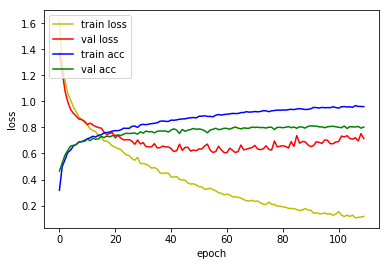

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.5667 - acc: 0.8077
Loss: 0.5667258001290835 Accuracy: 0.8076923

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.7137 - acc: 0.2631
Epoch 00001: val_loss improved from inf to 1.49720, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/001-1.4972.hdf5
4680/4680 [==============================] - 17s 4ms/sample - loss: 1.7135 - acc: 0.2630 - val_loss: 1.4972 - val_acc: 0.4269
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.4553 - acc: 0.4028
Epoch 00002: val_loss improved from 1.49720 to 1.35111, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/002-1.3511.hdf5
4680/4680 [==============================] - 15s 3ms/sample - loss: 1.4556 - acc: 0.4028 - val_loss: 1.3511 - val_acc: 0.4840
Epoch 3/500
4672/4680 [===========

Epoch 23/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6658 - acc: 0.7637
Epoch 00023: val_loss did not improve from 0.68715
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.6656 - acc: 0.7637 - val_loss: 0.7003 - val_acc: 0.7455
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6339 - acc: 0.7789
Epoch 00024: val_loss did not improve from 0.68715
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.6337 - acc: 0.7791 - val_loss: 0.7276 - val_acc: 0.7282
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.6381 - acc: 0.7772
Epoch 00025: val_loss improved from 0.68715 to 0.68479, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_4_conv_checkpoint/025-0.6848.hdf5
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.6382 - acc: 0.7771 - val_loss: 0.6848 - val_acc: 0.7571
Epoch 26/500
4672/4680 [============================>.] - ETA

4672/4680 [============================>.] - ETA: 0s - loss: 0.3825 - acc: 0.8694
Epoch 00048: val_loss did not improve from 0.53060
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.3836 - acc: 0.8692 - val_loss: 0.5474 - val_acc: 0.8026
Epoch 49/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3678 - acc: 0.8696
Epoch 00049: val_loss did not improve from 0.53060
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.3676 - acc: 0.8697 - val_loss: 0.5510 - val_acc: 0.7994
Epoch 50/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3790 - acc: 0.8643
Epoch 00050: val_loss did not improve from 0.53060
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.3785 - acc: 0.8645 - val_loss: 0.5699 - val_acc: 0.7929
Epoch 51/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3550 - acc: 0.8771
Epoch 00051: val_loss did not improve from 0.53060
4680/4680 [==============================] - 15s 3m

Epoch 77/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2359 - acc: 0.9161
Epoch 00077: val_loss did not improve from 0.51402
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.2355 - acc: 0.9162 - val_loss: 0.6077 - val_acc: 0.8090
Epoch 78/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2302 - acc: 0.9165
Epoch 00078: val_loss did not improve from 0.51402
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.2300 - acc: 0.9167 - val_loss: 0.5528 - val_acc: 0.8160
Epoch 79/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2236 - acc: 0.9214
Epoch 00079: val_loss did not improve from 0.51402
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.2240 - acc: 0.9212 - val_loss: 0.5547 - val_acc: 0.8141
Epoch 80/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2414 - acc: 0.9159
Epoch 00080: val_loss did not improve from 0.51402
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.1537 - acc: 0.9471
Epoch 00107: val_loss did not improve from 0.51402
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.1535 - acc: 0.9472 - val_loss: 0.5680 - val_acc: 0.8256
Epoch 108/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1192 - acc: 0.9606
Epoch 00108: val_loss did not improve from 0.51402
4680/4680 [==============================] - 15s 3ms/sample - loss: 0.1191 - acc: 0.9607 - val_loss: 0.5756 - val_acc: 0.8295
Epoch 109/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1278 - acc: 0.9546
Epoch 00109: val_loss did not improve from 0.51402
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.1276 - acc: 0.9547 - val_loss: 0.5939 - val_acc: 0.8224
Epoch 110/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1317 - acc: 0.9563
Epoch 00110: val_loss did not improve from 0.51402
4680/4680 [==============================] - 15s

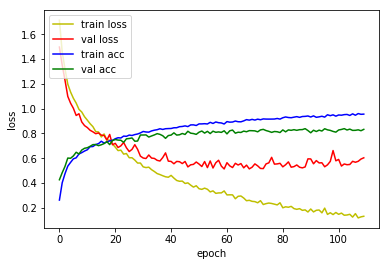

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.5140 - acc: 0.8218
Loss: 0.5140190430176563 Accuracy: 0.82179487

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.7005 - acc: 0.2802
Epoch 00001: val_loss improved from inf to 1.45787, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/001-1.4579.hdf5
4680/4680 [==============================] - 17s 4ms/sample - loss: 1.7012 - acc: 0.2799 - val_loss: 1.4579 - val_acc: 0.4468
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.3769 - acc: 0.4416
Epoch 00002: val_loss improved from 1.45787 to 1.21967, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/002-1.2197.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 1.3774 - acc: 0.4415 - val_loss: 1.2197 - val_acc: 0.5269
Epoch 3/500
4672/4680 [==========

4672/4680 [============================>.] - ETA: 0s - loss: 0.5365 - acc: 0.8142
Epoch 00024: val_loss improved from 0.66439 to 0.64089, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/024-0.6409.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.5368 - acc: 0.8141 - val_loss: 0.6409 - val_acc: 0.7660
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.5247 - acc: 0.8166
Epoch 00025: val_loss did not improve from 0.64089
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.5243 - acc: 0.8167 - val_loss: 0.6898 - val_acc: 0.7468
Epoch 26/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.5075 - acc: 0.8206
Epoch 00026: val_loss improved from 0.64089 to 0.61154, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_5_conv_checkpoint/026-0.6115.hdf5
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.5068 - 

4672/4680 [============================>.] - ETA: 0s - loss: 0.2309 - acc: 0.9217
Epoch 00050: val_loss did not improve from 0.54209
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2316 - acc: 0.9214 - val_loss: 0.6656 - val_acc: 0.7821
Epoch 51/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2454 - acc: 0.9092
Epoch 00051: val_loss did not improve from 0.54209
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2474 - acc: 0.9088 - val_loss: 0.6043 - val_acc: 0.8038
Epoch 52/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2638 - acc: 0.9067
Epoch 00052: val_loss did not improve from 0.54209
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.2634 - acc: 0.9068 - val_loss: 0.5496 - val_acc: 0.8327
Epoch 53/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2015 - acc: 0.9326
Epoch 00053: val_loss did not improve from 0.54209
4680/4680 [==============================] - 16s 3m

4672/4680 [============================>.] - ETA: 0s - loss: 0.0689 - acc: 0.9797
Epoch 00080: val_loss did not improve from 0.54209
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.0689 - acc: 0.9797 - val_loss: 0.6743 - val_acc: 0.8314
Epoch 81/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0706 - acc: 0.9784
Epoch 00081: val_loss did not improve from 0.54209
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.0705 - acc: 0.9784 - val_loss: 0.6776 - val_acc: 0.8250
Epoch 82/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0649 - acc: 0.9810
Epoch 00082: val_loss did not improve from 0.54209
4680/4680 [==============================] - 16s 3ms/sample - loss: 0.0649 - acc: 0.9810 - val_loss: 0.6953 - val_acc: 0.8128
Epoch 83/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0832 - acc: 0.9705
Epoch 00083: val_loss did not improve from 0.54209
4680/4680 [==============================] - 16s 3m

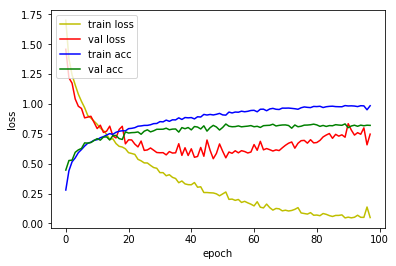

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.5421 - acc: 0.8212
Loss: 0.5420906183047173 Accuracy: 0.8211538



In [12]:
for i in range(2, 6):
    base = 'vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_32_DO(conv_num=i)
#     model = multi_gpu_model(model, gpus=2)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [13]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(2, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_2_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      25632     
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 32)      0         
_________________________________________________________________
max_pooling

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.5421 - acc: 0.8212
Loss: 0.5420906183047173 Accuracy: 0.8211538


In [14]:
for i in range(2, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_imagenet_6_class_2D_CNN_custom_ch_32_DO_050_DO_2_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 32)      2432      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 32)      25632     
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 32)      0         
_________________________________________________________________
max_pooling

1560/1560 [==============================] - 3s 2ms/sample - loss: 0.7477 - acc: 0.8212
Loss: 0.7477427534568004 Accuracy: 0.8211538
